In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from astropy import units as u

from poliastro.bodies import Earth
from poliastro.twobody import State
from poliastro.maneuver import Maneuver

In [2]:
ZOOM = True

R = np.linspace(2, 75, num=100)
Rstar = [15.58, 40, 60, 100, 200, np.inf]

hohmann_data = np.zeros_like(R)
bielliptic_data = np.zeros((len(R), len(Rstar)))

ss_i = State.circular(Earth, 1.8 * u.km)
r_i = ss_i.a
v_i = np.sqrt(ss_i.v.dot(ss_i.v))
for ii, r in enumerate(R):
    r_f = r * r_i
    man = Maneuver.hohmann(ss_i, r_f)
    hohmann_data[ii] = (man.get_total_cost() / v_i).decompose().value
    for jj, rstar in enumerate(Rstar):
        r_b = rstar * r_i
        man = Maneuver.bielliptic(ss_i, r_b, r_f)
        bielliptic_data[ii, jj] = (man.get_total_cost() / v_i).decompose().value

idx_max = np.argmax(hohmann_data)

ylims = (0.35, 0.6)

/home/juanlu/.miniconda3/envs/poliastro34/lib/python3.4/site-packages/astropy/units/quantity.py:785: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self, other)


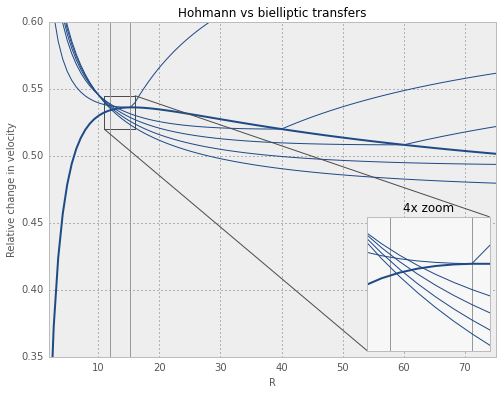

In [3]:
plt.style.use('pybonacci')

fig, ax = plt.subplots(figsize=(8, 6))

l, = ax.plot(R, hohmann_data, lw=2)
for jj in range(len(Rstar)):
    ax.plot(R, bielliptic_data[:, jj], color=l.get_color())
ax.vlines([11.94, R[idx_max]], *ylims, color='0.6')

if ZOOM:
    ax_zoom = zoomed_inset_axes(ax, 4, loc=4, axes_kwargs={'axisbg': '0.97'})
    ax_zoom.plot(R, hohmann_data, lw=2)
    for jj in range(len(Rstar)):
        ax_zoom.plot(R, bielliptic_data[:, jj], color=l.get_color())
    ax_zoom.vlines([11.94, R[idx_max]], *ylims, color='0.6')

    ax_zoom.set_xlim(11.0, 16.0)
    ax_zoom.set_ylim(0.52, 0.545)
    ax_zoom.set_xticks([])
    ax_zoom.set_yticks([])
    ax_zoom.grid(False)
    ax_zoom.set_title("4x zoom")
    mark_inset(ax, ax_zoom, loc1=1, loc2=3, fc="none", ec='0.3')

ax.set_xlabel("R")
ax.set_ylabel("Relative change in velocity")
ax.set_ylim(*ylims)
ax.set_xlim(2, 75)
ax.set_title("Hohmann vs bielliptic transfers")